https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

각 모델의 코드
https://github.com/fchollet/deep-learning-models


케라스가 지원해준 코드
keras model https://github.com/keras-team/keras/tree/master/keras/applications<br/>
https://keras.io/api/applications/<br/>

Efficientnet
https://github.com/qubvel/efficientnet

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [4]:
# construct the argument parse and parse the arguments
'''
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to the input image")
ap.add_argument("-model", "--model", type=str, default="vgg16",
	help="name of pre-trained network to use")
args = vars(ap.parse_args())
'''

#args = {"image": "soccer_ball.jpg","model":["vgg16"]} (224, 224)
args = {"model":["vgg16","vgg19","resnet","inception","xception"]}
#"vgg16","vgg19","resnet" (224, 224)
#args = {model":["inception","xception"]} #(299, 299)
#"inception", "xception"

In [ ]:

'''
python classify_image.py --image images/soccer_ball.jpg --model vgg16
python classify_image.py --image images/bmw.png --model vgg19
python classify_image.py --image images/clint_eastwood.jpg --model resnet
python classify_image.py --image images/jemma.png --model resnet
python classify_image.py --image images/boat.png --model inception
python classify_image.py --image images/office.png --model inception
python classify_image.py --image images/scotch.png --model xception
python classify_image.py --image images/tv.png --model vgg16
'''


In [5]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

# esnure a valid model name was supplied via command line argument
for model in args["model"]:
	if model not in MODELS.keys():
		raise AssertionError("The --model command line argument should "
			"be a key in the 'MODELS' dictionary")

In [6]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape_1 = (224, 224)
preprocess = imagenet_utils.preprocess_input
	
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image pre-processing function
for model in args["model"]:
	if model in ("inception", "xception"):
		inputShape_2 = (299, 299)
		preprocess = preprocess_input

In [7]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(args["model"]))
modelDict = {}
for model_name in args["model"]:
  Network = MODELS[model_name]
  model = Network(weights="imagenet")
  modelDict[model_name] = model

  model.summary()

[INFO] loading ['vgg16', 'vgg19', 'resnet', 'inception', 'xception']...
553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)    

In [ ]:
!pwd

/content


In [8]:
from google.colab import files
from tensorflow.keras.models import load_model

uploaded = files.upload()
path = ""
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  print(path)

Saving bmw.png to bmw.png
/content/bmw.png


In [9]:
print(path.split("/")[-1])
imageName = path.split("/")[-1]

bmw.png


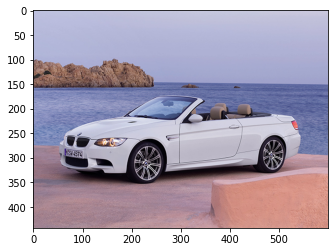

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(imageName)

plt.imshow(img)
plt.show()

In [ ]:
print(inputShape_2)
print(inputShape_1)

(299, 299)
(224, 224)


In [11]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network

print("[INFO] loading and pre-processing image...")
print(imageName)

def readImage(model):
  inputShape = inputShape_2 if model in ("inception", "xception") else inputShape_1
  print(model, "===", inputShape)
  image = load_img(imageName, target_size=inputShape)
  print("[INFO1] loading and pre-processing image...")
  image = img_to_array(image)

  # our input image is now represented as a NumPy array of shape
  # (inputShape[0], inputShape[1], 3) however we need to expand the
  # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
  # so we can pass it through the network
  image = np.expand_dims(image, axis=0)

  # pre-process the image using the appropriate function based on the
  # model that has been loaded (i.e., mean subtraction, scaling, etc.)
  image = preprocess(image)

  return image
################### input/output error

[INFO] loading and pre-processing image...
bmw.png


In [ ]:
print(modelDict.keys())

dict_keys(['vgg16', 'vgg19', 'resnet', 'inception', 'xception'])


In [12]:
# classify the image
print("[INFO] classifying image with '{}'...".format(args["model"]))
cnt = 0
PDict = {}
for (model_name , model) in modelDict.items():
	print(":================",model_name)
	preds = model.predict(readImage(model_name))
	P = imagenet_utils.decode_predictions(preds)
	PDict[model_name] = P
	# loop over the predictions and display the rank-5 predictions +
	# probabilities to our terminal
	for (i, (imagenetID, label, prob)) in enumerate(P[0]):
		print("model:{} {}. {}: {:.2f}%".format(args["model"][cnt],i + 1, label, prob * 100))
	
	cnt += 1

[INFO] classifying image with '['vgg16', 'vgg19', 'resnet', 'inception', 'xception']'...
:================ vgg16
vgg16 === (224, 224)
[INFO1] loading and pre-processing image...
40960/35363 [==================================] - 0s 0us/step
model:vgg16 1. mosquito_net: 6.04%
model:vgg16 2. toilet_tissue: 3.54%
model:vgg16 3. envelope: 2.07%
model:vgg16 4. carton: 1.57%
model:vgg16 5. photocopier: 1.36%
:================ vgg19
vgg19 === (224, 224)
[INFO1] loading and pre-processing image...
model:vgg19 1. mosquito_net: 8.74%
model:vgg19 2. toilet_tissue: 1.96%
model:vgg19 3. envelope: 1.84%
model:vgg19 4. bassinet: 1.80%
model:vgg19 5. Band_Aid: 1.64%
:================ resnet
resnet === (224, 224)
[INFO1] loading and pre-processing image...
model:resnet 1. nematode: 11.77%
model:resnet 2. matchstick: 4.02%
model:resnet 3. nail: 2.68%
model:resnet 4. hourglass: 1.84%
model:resnet 5. lighter: 1.68%
:================ inception
inception === (299, 299)
[INFO1] loading and pre-processing ima

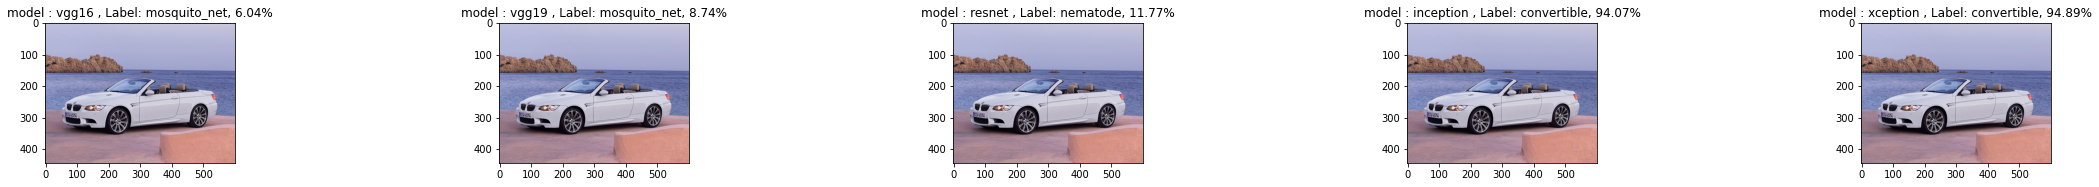

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(imageName)

num_rows = 1
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*4*num_cols, 5*num_rows))
cnt = 0
for (model_name , P) in PDict.items():
  (imagenetID, label, prob) = P[0][0]
  plt.subplot(num_rows, 2*num_cols, 2*cnt+1)
  plt.title("model : {} , Label: {}, {:.2f}%".format(model_name, label, prob * 100))
  plt.imshow(img)
  cnt += 1
plt.show()


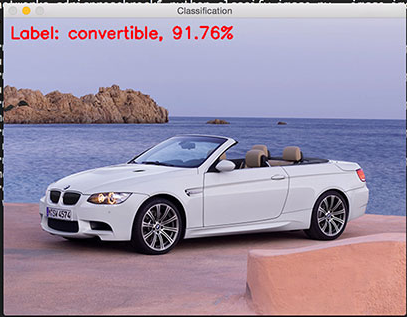

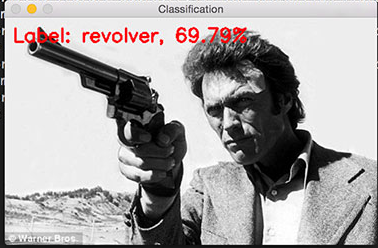

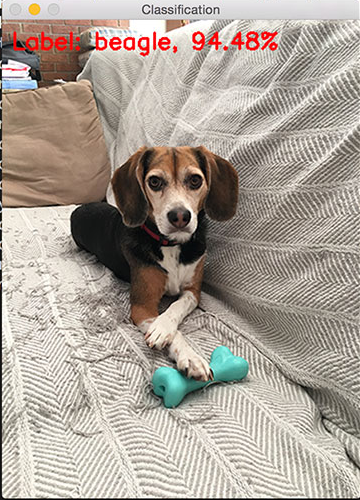

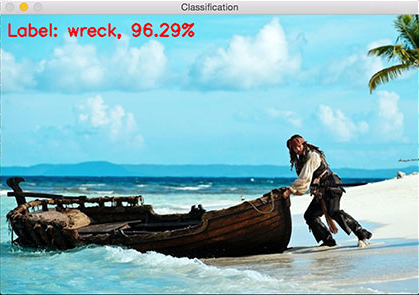

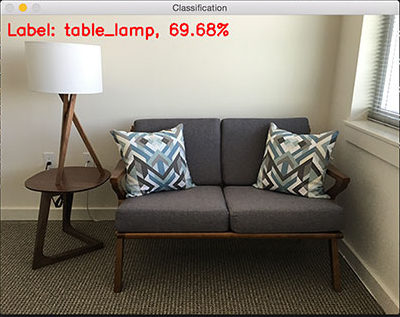

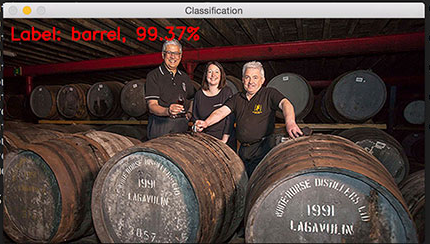

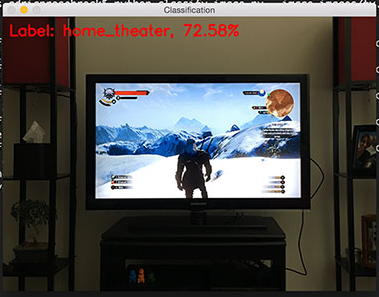